# Broadcasted NN
This notebook extends the previous one with proper PyTorch batch handling. I expected greater speed ups, but I'm guessing a large part of that is disk IO from the data loader reading the images each time.

It's interesting how batch size interacts with the learning rate.
Also how sometimes there is a smooth accuracy gain, while other times it's very puntuated equilibrium.

In [1]:
import random
from datetime import datetime

import torch
import numpy as np
import fastbook
from torch import tensor

import mnist
from monitoring import graph_updater
from math_funcs import get_accuracy, L2, Sigmoid
from network import Network

fastbook.setup_book()     

training_set, testing_set, validation_set = mnist.datasets(0.8)

1600 334 400


In [2]:
def run_epoch(network, dataset, lr):
    accuracy = []
    costs = []
    
    for xs, expected in iter(dataset):
        activations = network.forward(xs)
        output = activations[-1]
        grad = network.gradient(activations, expected)
        network.update(grad, lr)
        
        accuracy.append(get_accuracy(expected, output))
        costs.append(network.cost(expected, output))

    return tensor(accuracy).float().mean(), torch.stack(costs).mean()


def train(network, dataset, epochs, lr, show_progress=True):
    if show_progress:
        add_datapoint = graph_updater()
    
    for epoch in range(epochs):
        start = datetime.now()
        
        avg_accuracy, avg_cost = run_epoch(network, dataset, lr)
        
        if show_progress and (not epoch % 1):
            print(f'epoch {epoch}: accuracy={round(avg_accuracy.item(), 3)}, cost={round(avg_cost.item(), 3)}, time: {datetime.now() - start}')
            add_datapoint(avg_accuracy)
    
    return avg_accuracy, avg_cost

In [14]:
n = Network((28*28, 100, 10))

epoch 220: accuracy=0.901, cost=0.082, time: 0:00:01.215700


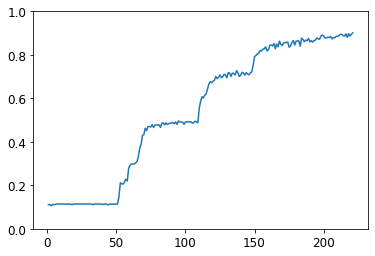

In [ ]:
#data = mnist.sample(len(training_set.dataset), 64)
data = mnist.sample(256 * 20, 256)
train(n, data, epochs=700, lr=3)